# Search Engine - Rahaal Team

Kindly, run the code from [Semntaic Search using IndexFlatL2 method]( Semntaic-Search-using-IndexFlatL2-method)

In [ ]:
 from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install pandas transformers tqdm


## Sentemint analsis

In [ ]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch

# Load tokenizer and model
tokenizer = AutoTokenizer.from_pretrained("finiteautomata/bertweet-base-sentiment-analysis")
model = AutoModelForSequenceClassification.from_pretrained("finiteautomata/bertweet-base-sentiment-analysis")

In [ ]:
# Access the labels of the model
labels = model.config.id2label

# Print the labels
print(labels)

In [ ]:
# prompt: /content/drive/MyDrive/نسخة من Embedd-Data.csv read file

import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/نسخة من Embedd-Data.csv')


In [ ]:
# prompt: concatenate the review_title andreview_text coloumns then add it to the dataframe

df['combined_text'] = df['review_title']+'' + df['review_text']


In [ ]:
# prompt: df['review_text'] if null put it empty string then add combined with df['review_title']

# Fill null values in 'review_text' with empty strings
df['review_text'].fillna('', inplace=True)

# Combine 'review_title' and 'review_text' into 'combined_text'
df['combined_text'] = df['review_title'] + '' + df['review_text']


In [ ]:
import torch
from tqdm import tqdm

# Assuming List_of_review is already defined from df['combined_text']
List_of_review = df['combined_text']

def analyze_sentiment(reviews):
    list_of_sentiment = []

    for review in tqdm(reviews, desc="Analyzing Sentiments", unit="review"):
        # Tokenize the input text, truncating to the model's max length
        inputs = tokenizer(review, return_tensors="pt", truncation=True, max_length=128)  # Adjust max_length if needed

        # Get model predictions
        with torch.no_grad():
            outputs = model(**inputs)

        # Get the sentiment label
        logits = outputs.logits
        sentiment = torch.argmax(logits, dim=1).item()

        # Append the sentiment to the list
        list_of_sentiment.append(sentiment)

    return list_of_sentiment

# Perform sentiment analysis on the list of reviews
list_of_sentiment = analyze_sentiment(List_of_review)

# Define a mapping for sentiment labels
sentiment_labels = {0: 'NEG', 1: 'NEU', 2: 'POS'}

# Map the sentiment values to their corresponding labels
list_of_sentiment_labels = [sentiment_labels[sentiment] for sentiment in list_of_sentiment]

# Print the results
for review, sentiment in zip(List_of_review, list_of_sentiment_labels):
    print(f"Review: {review}\nSentiment: {sentiment}\n")


In [ ]:
# Add the 'sentiment' column to the DataFrame
df['sentiment'] = list_of_sentiment_labels[:len(df)]  # Ensure lengths match

# Display the updated DataFrame to verify the new column
print(df.head())

# Save the DataFrame to a CSV file
df.to_csv('sentiment_analysis_results.csv', index=False)

In [ ]:
# Remove rows where the 'sentiment' column has the value 'NEG'
df_filtered = df[df['sentiment'] != 'NEG']

# Display the updated DataFrame to verify the changes
print(df_filtered.head())
# Save the updated DataFrame to a new CSV file
df_filtered.to_csv('sentiment_analysis_results_filtered.csv', index=False)


## Regular search with prof hamza embeddings

In [ ]:
import pandas as pd
df1 = pd.read_csv('/content/drive/MyDrive/sentiment_analysis_results_filtered.csv')

In [ ]:
df1

,Unnamed: 0,hotel_name,hotel_description,review_title,review_text,rate,tripdate,hotel_url,hotel_image,price_range,rating_value,review_count,street_address,locality,country,combined_review,embeddings,sentiment
0,0,Romance Istanbul Hotel,Romance Istanbul Hotel has 39 rooms.Every room...,"An exceptional boutique hotel, great value for...","An exceptional boutique hotel, great value for...",NaN,February 2020,https://www.tripadvisor.com/Hotel_Review-g2939...,https://media-cdn.tripadvisor.com/media/photo-...,$ (Based on Average Nightly Rates for a Standa...,5.0,4023,Hudavendigar Cd. No:5 Sirkeci,Istanbul,Turkiye,"An exceptional boutique hotel, great value for...","[-1.1348376274108887, 1.802743673324585, -5.20...",POS
1,1,Romance Istanbul Hotel,Romance Istanbul Hotel has 39 rooms.Every room...,You can’t get better than this.,You can’t get better than this.,NaN,March 2021,https://www.tripadvisor.com/Hotel_Review-g2939...,https://media-cdn.tripadvisor.com/media/photo-...,$ (Based on Average Nightly Rates for a Standa...,5.0,4023,Hudavendigar Cd. No:5 Sirkeci,Istanbul,Turkiye,You can’t get better than this. You can’t get ...,"[2.011662721633911, -0.022828077897429466, -4....",POS
2,2,Romance Istanbul Hotel,Romance Istanbul Hotel has 39 rooms.Every room...,Exceeds all expectations,Exceeds all expectations,NaN,March 2021,https://www.tripadvisor.com/Hotel_Review-g2939...,https://media-cdn.tripadvisor.com/media/photo-...,$ (Based on Average Nightly Rates for a Standa...,5.0,4023,Hudavendigar Cd. No:5 Sirkeci,Istanbul,Turkiye,Exceeds all expectations Exceeds all expectations,"[0.13323014974594116, 1.3691492080688477, -5.7...",POS
3,3,Romance Istanbul Hotel,Romance Istanbul Hotel has 39 rooms.Every room...,"Great Location, Fantastic Accommodations","Great Location, Fantastic Accommodations",NaN,August 2021,https://www.tripadvisor.com/Hotel_Review-g2939...,https://media-cdn.tripadvisor.com/media/photo-...,$ (Based on Average Nightly Rates for a Standa...,5.0,4023,Hudavendigar Cd. No:5 Sirkeci,Istanbul,Turkiye,"Great Location, Fantastic Accommodations Great...","[-1.0223147869110107, 1.7390284538269043, -5.4...",POS
4,4,Romance Istanbul Hotel,Romance Istanbul Hotel has 39 rooms.Every room...,Perfection. It is all in the details.,Perfection. It is all in the details.,NaN,June 2021,https://www.tripadvisor.com/Hotel_Review-g2939...,https://media-cdn.tripadvisor.com/media/photo-...,$ (Based on Average Nightly Rates for a Standa...,5.0,4023,Hudavendigar Cd. No:5 Sirkeci,Istanbul,Turkiye,Perfection. It is all in the details. Perfecti...,"[1.8795020580291748, 0.4809856116771698, -4.66...",POS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5215,5992,Hotel Campanile Paris Bercy Village,"In the east of Paris, the hotel Campanile Berc...",Nice hotel but had trouble booking in.,We had just had a very long and delayed train ...,3.0,September 2019,https://www.tripadvisor.com/Hotel_Review-g1871...,https://media-cdn.tripadvisor.com/media/photo-...,$ (Based on Average Nightly Rates for a Standa...,4.0,1625,17 rue Baron le Roy,Paris,France,Nice hotel but had trouble booking in. We had ...,"[0.03362488001585007, 1.2810380458831787, -3.3...",NEU
5216,5993,Hotel Campanile Paris Bercy Village,"In the east of Paris, the hotel Campanile Berc...",Great Location,We stayed at the Kyriad Hotel Paris Bercy Vill...,4.0,September 2019,https://www.tripadvisor.com/Hotel_Review-g1871...,https://media-cdn.tripadvisor.com/media/photo-...,$ (Based on Average Nightly Rates for a Standa...,4.0,1625,17 rue Baron le Roy,Paris,France,Great Location We stayed at the Kyriad Hotel P...,"[-0.3739036023616791, 0.6458818912506104, -4.4...",POS
5217,5994,Hotel Campanile Paris Bercy Village,"In the east of Paris, the hotel Campanile Berc...",Great location,Stayed here for a few days and it is a great l...,5.0,October 2019,https://www.tripadvisor.com/Hotel_Review-g1871...,https://media-cdn.tripadvisor.com/media/photo-...,$ (Based on Average Nightly Rates for a Stan

In [ ]:

import ast
df1['embeddings'] = df1['embeddings'].apply(ast.literal_eval)


In [ ]:
df1['embeddings'] = df1['embeddings'].apply(lambda x: list(x) if not isinstance(x, list) else x)


In [ ]:
type(df1['embeddings'].iloc[0])


list

In [ ]:
embeddings_list = df1['embeddings']


In [ ]:
embeddings_list[0]

[-1.1348376274108887,
 1.802743673324585,
 -5.20807409286499,
 0.4646131992340088,
 -0.07615038752555847,
 0.3601483106613159,
 0.49313318729400635,
 1.7277247905731201,
 0.6533438563346863,
 -0.5024026036262512,
 -0.3754514455795288,
 0.10266927629709244,
 0.7372647523880005,
 -1.0479615926742554,
 -0.035242870450019836,
 -1.2268619537353516,
 -0.6591411232948303,
 -1.133756160736084,
 0.6181418299674988,
 0.11195838451385498,
 -2.0508344173431396,
 -1.1795698404312134,
 -0.5152504444122314,
 -0.973770797252655,
 2.7461884021759033,
 0.7543472051620483,
 -0.008855130523443222,
 1.2128504514694214,
 -0.9450576305389404,
 1.0975918769836426,
 -0.6433581709861755,
 -1.0939148664474487,
 -0.15337228775024414,
 -0.530336856842041,
 0.6583735942840576,
 -0.4568222761154175,
 0.7069573998451233,
 0.7251775860786438,
 0.2048865109682083,
 -0.4328620731830597,
 1.949992060661316,
 0.6267697811126709,
 0.5755907893180847,
 0.06180452182888985,
 1.8882248401641846,
 0.3578234612941742,
 1.044484

In [ ]:

print(type(embeddings_list[0]))


<class 'list'>


In [ ]:
import numpy as np
embeddings_array = np.vstack(embeddings_list)
embeddings_array.shape


(5220, 768)

In [ ]:
import numpy as np
!pip install faiss-gpu #cpu

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.5/85.5 MB 9.1 MB/s eta 0:00:00


In [ ]:
import faiss


In [ ]:
faiss.Index

faiss.swigfaiss.Index

In [ ]:
dimension=768

In [ ]:
index = faiss.IndexFlatL2(dimension)

In [ ]:
import faiss
import numpy as np

embeddings_array_c = np.ascontiguousarray(embeddings_array, dtype=np.float32)

index.add(embeddings_array_c)

In [ ]:
!pip install sentence_transformers

  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl.metadata (1.8 kB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinu

In [ ]:
from sentence_transformers import SentenceTransformer

model = SentenceTransformer("nomic-ai/nomic-embed-text-v1.5",trust_remote_code=True)

/usr/local/lib/python3.10/dist-packages/sentence_transformers/cross_encoder/CrossEncoder.py:11: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm, trange
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/255 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/140 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/71.2k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/120 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/2.06k [00:00<?, ?B/s]

configuration_hf_nomic_bert.py:   0%|          | 0.00/1.96k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/nomic-ai/nomic-bert-2048:
- configuration_hf_nomic_bert.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


modeling_hf_nomic_bert.py:   0%|          | 0.00/84.7k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/nomic-ai/nomic-bert-2048:
- modeling_hf_nomic_bert.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


model.safetensors:   0%|          | 0.00/547M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/1.19k [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/711k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/695 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/286 [00:00<?, ?B/s]

In [ ]:
!pip install sklearn

from sklearn.metrics.pairwise import cosine_similarity

  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [ ]:
query = 'close to Louvre and great food nearby but not too expensive'

In [ ]:
# search through the reviews for a specific product
def search_reviews(df, query, n=5, pprint=True):

    # Embed your search query.
    query_embedding = model.encode(query,show_progress_bar=True)

    # Reshape the query embedding to be a 2D array
    query_embedding_2d = query_embedding.reshape(1, -1)

    # As before, create a 'similarity' column, which shows the cosine similarity between the your query and the embedded combined contents.
    # REMEMBER!! YOU ARE USING THE SAME MODEL TO EMBED BOTH THE COMBINED CONTENTS AND YOUR QUERY.
    df["similarity"] = df.embeddings.apply(lambda x: cosine_similarity([x], query_embedding_2d)[0][0]) #similarity against each doc, converting x to a list within a list and extracting the similarity score

    # Now, sort the values bty similarity, and choose the most similar doc.
    results = (
        df.sort_values("similarity", ascending=False) # re-rank
        .head(n))

    return results
results = search_reviews(df1,query,15)

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
results

,Unnamed: 0,hotel_name,hotel_description,review_title,review_text,rate,tripdate,hotel_url,hotel_image,price_range,rating_value,review_count,street_address,locality,country,combined_review,embeddings,sentiment,similarity
5064,5803,Hotel Square Louvois,Its location in the heart of Paris’ 2nd arrond...,Nice hotel within walking distance to the Louvre,Lovely stylish hotel with friendly staff and g...,5.0,October 2023,https://www.tripadvisor.com/Hotel_Review-g1871...,https://media-cdn.tripadvisor.com/media/photo-...,$$ (Based on Average Nightly Rates for a Stand...,5.0,612,12 rue de Louvois,Paris,France,Nice hotel within walking distance to the Louv...,"[-1.1282187700271606, 1.1223511695861816, -4.2...",POS,0.736201
4709,5402,Hotel Moliere,New four star boutique hotel in chic 1st arron...,Very nice Hotel near the Louvre,The hotel is very clean. Our room was very nic...,5.0,December 2023,https://www.tripadvisor.com/Hotel_Review-g1871...,https://media-cdn.tripadvisor.com/media/photo-...,$$ (Based on Average Nightly Rates for a Stand...,5.0,1092,21 rue Moliere 1st Arr.,Paris,France,Very nice Hotel near the Louvre The hotel is v...,"[-0.8884088397026062, 0.9485998749732971, -3.9...",POS,0.726487
4801,5497,Hotel du Danube Saint Germain,A charming 3-star hotel in the heart of Saint ...,Great location near The Louvre,"Upon arrival, the staff at the hotel were very...",5.0,September 2023,https://www.tripadvisor.com/Hotel_Review-g1871...,https://media-cdn.tripadvisor.com/media/photo-...,$$ (Based on Average Nightly Rates for a Stand...,4.5,679,58 rue Jacob,Paris,France,"Great location near The Louvre Upon arrival, t...","[-0.6709115505218506, 1.1736654043197632, -3.8...",POS,0.722415
4730,5424,Hotel Moliere,New four star boutique hotel in chic 1st arron...,To revisit,One of the quietest rooms I ever slept in in P...,5.0,October 2023,https://www.tripadvisor.com/Hotel_Review-g1871...,https://media-cdn.tripadvisor.com/media/photo-...,$$ (Based on Average Nightly Rates for a Stand...,5.0,1092,21 rue Moliere 1st Arr.,Paris,France,To revisit One of the quietest rooms I ever sl...,"[-0.3145066499710083, 0.8965334892272949, -4.4...",POS,0.700557
4240,4922,La Maison Favart,"La Maison Favart opened on April, 13th 2012 af...",Wonderful hotel near the Louvre,We stayed at the Maison Favart for three days....,5.0,December 2023,https://www.tripadvisor.com/Hotel_Review-g1871...,https://media-cdn.tripadvisor.com/media/photo-...,$$ (Based on Average Nightly Rates for a Stand...,5.0,2265,"5, Rue de Marivaux 2nd Arr",Paris,France,Wonderful hotel near the Louvre We stayed at t...,"[-0.1887028068304062, 0.8217839598655701, -4.1...",POS,0.699838
4301,4983,Grand Hotel du Palais Royal,Un hôtel 5 étoiles au coeur de Paris ! Grâce à...,"Great hotel, great location, great service, bu...",Great hotel located in the best part of town j...,5.0,October 2023,https://www.tripadvisor.com/Hotel_Review-g1871...,https://media-cdn.tripadvisor.com/media/photo-...,$$$ (Based on Average Nightly Rates for a Stan...,5.0,1502,4 Rue de Valois,Paris,France,"Great hotel, great location, great service, bu...","[-0.7037900686264038, 1.3362994194030762, -4.0...",POS,0.698727
5088,5828,Hotel Square Louvois,Its location in the heart of Paris’ 2nd arrond...,Awesome all around,What a great hotel. The staff was over the top...,5.0,December 2022,https://www.tripadvisor.com/Hotel_Review-g1871...,https://media-cdn.tripadvisor.com/media/photo-...,$$ (Based on Average Nightly Rates for a Stand...,5.0,612,12 rue de Louvois,Paris,France,Awesome all around What a great hotel. The sta...,"[-1.3092468976974487, 0.7207908034324646, -4.7...",POS,0.695559
5058,5797,Hotel Square Louvois,Its location in the heart of Paris’ 2nd arrond...,Excellent 3 nights stay,Stayed 3 nights in their superior room. Great ...,5.0,November 2023,https://www.tripadvisor.com/Hotel_Review-g1871...,https://media-cdn.tripadvisor.com/media/photo-...,$$ (Based on Average Nightly Rates for a Stand...,5.0,612,12 rue de Louvois,Paris,Fran

In [ ]:
query2 = 'i want a hotel in the center of the city in paris'

In [ ]:
results = search_reviews(df1,query2,15)

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
results

,Unnamed: 0,hotel_name,hotel_description,review_title,review_text,rate,tripdate,hotel_url,hotel_image,price_range,rating_value,review_count,street_address,locality,country,combined_review,embeddings,sentiment,similarity
4802,5498,Hotel du Danube Saint Germain,A charming 3-star hotel in the heart of Saint ...,Perfect location perfect place,We loved this hotel. The perfect location in ...,5.0,September 2023,https://www.tripadvisor.com/Hotel_Review-g1871...,https://media-cdn.tripadvisor.com/media/photo-...,$$ (Based on Average Nightly Rates for a Stand...,4.5,679,58 rue Jacob,Paris,France,Perfect location perfect place We loved this h...,"[-0.2456599324941635, 0.43250715732574463, -4....",POS,0.778156
4542,5233,Hotel 34B - Astotel,You'll be amazed by the 100% French interiors ...,Exactly what I needed,"Perfect as expected Room/service/ place, in t...",5.0,October 2023,https://www.tripadvisor.com/Hotel_Review-g1871...,https://media-cdn.tripadvisor.com/media/photo-...,$ (Based on Average Nightly Rates for a Standa...,5.0,3399,34 Rue Bergere,Paris,France,Exactly what I needed Perfect as expected Ro...,"[-0.3702453374862671, 0.4103393852710724, -4.3...",POS,0.777853
4191,4872,Hotel Astoria - Astotel,At the heart of a quiet street between Opera a...,Nice and affordable accommodation in the cente...,Really nice and well located hotel. Good value...,5.0,October 2023,https://www.tripadvisor.com/Hotel_Review-g1871...,https://media-cdn.tripadvisor.com/media/photo-...,$ (Based on Average Nightly Rates for a Standa...,4.5,2427,42 rue de Moscou 8th Arr.,Paris,France,Nice and affordable accommodation in the cente...,"[-0.7003978490829468, 0.5944035053253174, -4.1...",POS,0.769438
4216,4897,Novotel Paris Les Halles,The Novotel Paris Les Halles is a 4 star hotel...,A very practical hotel in Paris,This very nice hotel provides value for money ...,5.0,November 2023,https://www.tripadvisor.com/Hotel_Review-g1871...,https://media-cdn.tripadvisor.com/media/photo-...,$$ (Based on Average Nightly Rates for a Stand...,4.5,6929,8 Place Marguerite de Navarre,Paris,France,A very practical hotel in Paris This very nice...,"[-0.8351045846939087, 1.1693638563156128, -4.2...",POS,0.768890
4936,5658,Pullman Paris Eiffel Tower Hotel,"Stay at the Pullman Paris Tour Eiffel, the fav...",Good and centrally located hotel in Paris,Its a good property and is centrally located w...,4.0,October 2023,https://www.tripadvisor.com/Hotel_Review-g1871...,https://media-cdn.tripadvisor.com/media/photo-...,$$ (Based on Average Nightly Rates for a Stand...,4.0,3935,18 Avenue de Suffren,Paris,France,Good and centrally located hotel in Paris Its ...,"[-0.6709700226783752, -0.1077147126197815, -4....",POS,0.764175
4888,5591,Hotel Europe Saint Severin,Friendly and comfortable property located in t...,Very nice hotel in great location,Would recommend this hotel for anyone who want...,4.0,September 2023,https://www.tripadvisor.com/Hotel_Review-g1871...,https://media-cdn.tripadvisor.com/media/photo-...,$ (Based on Average Nightly Rates for a Standa...,4.5,2951,38 rue Saint Severin,Paris,France,Very nice hotel in great location Would recomm...,"[-0.6827912926673889, 1.3697127103805542, -4.0...",POS,0.761148
4406,5093,Hotel Joke - Astotel,"Located in the 9th district, between Montmartr...",Just a great option,For a city like Paris where there are either m...,5.0,November 2023,https://www.tripadvisor.com/Hotel_Review-g1871...,https://media-cdn.tripadvisor.com/media/photo-...,$ (Based on Average Nightly Rates for a Standa...,5.0,2196,69 Rue Blanche,Paris,France,Just a great option For a city like Paris wher...,"[-0.5630813241004944, 0.6318200826644897, -3.9...",POS,0.760718
4119,4800,Hotel Malte - Astotel,Located in the 2nd district next to the Stock ...,"Good location, excellent staff and large room",Good central location - close to Metro and man...,5.0,December 2023,https://www.tripadvisor.com/Hotel_Review-g1871...,https://media-cdn.tripadvisor.com/media/photo-...,$$ (Based on Average Nigh

## Image captioning

In [ ]:
# Assuming 'train' is the split you want to access
hotel_images = df1['hotel_image']
hotel_names = df1['hotel_name']
# Print the first 5 hotel image URLs
df = pd.DataFrame({ 'hotel_name': hotel_names,'hotel_image': hotel_images})

In [ ]:
df.head()

,hotel_name,hotel_image
0,Romance Istanbul Hotel,https://media-cdn.tripadvisor.com/media/photo-...
1,Romance Istanbul Hotel,https://media-cdn.tripadvisor.com/media/photo-...
2,Romance Istanbul Hotel,https://media-cdn.tripadvisor.com/media/photo-...
3,Romance Istanbul Hotel,https://media-cdn.tripadvisor.com/media/photo-...
4,Romance Istanbul Hotel,https://media-cdn.tripadvisor.com/media/photo-...


In [ ]:

df= df.drop_duplicates()
df.head()


,hotel_name,hotel_image
0,Romance Istanbul Hotel,https://media-cdn.tripadvisor.com/media/photo-...
40,Hotel Sultania,https://dynamic-media-cdn.tripadvisor.com/medi...
80,Conrad Istanbul Bosphorus,https://media-cdn.tripadvisor.com/media/photo-...
118,Hilton Istanbul Bomonti Hotel & Conference Center,https://media-cdn.tripadvisor.com/media/photo-...
155,Hotel Yasmak Sultan,https://dynamic-media-cdn.tripadvisor.com/medi...


In [ ]:
len(df)

150

In [ ]:
from matplotlib import pyplot as plt
import numpy as np
from PIL import Image
import requests
import tqdm as tqdm

from transformers import BlipProcessor, BlipForConditionalGeneration

processor = BlipProcessor.from_pretrained("Salesforce/blip-image-captioning-base")
model = BlipForConditionalGeneration.from_pretrained("Salesforce/blip-image-captioning-base")


preprocessor_config.json:   0%|          | 0.00/287 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/506 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/711k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/4.56k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/990M [00:00<?, ?B/s]

In [ ]:
import requests
from PIL import Image
from io import BytesIO
import time

def download_image(url, retries=3, delay=5):
    for attempt in range(retries):
        try:
            response = requests.get(url, stream=True)
            response.raise_for_status()  # Raise an error for bad status codes
            return Image.open(BytesIO(response.content)).convert('RGB')
        except requests.exceptions.RequestException as e:
            print(f"Attempt {attempt + 1} failed: {e}")
            time.sleep(delay)
    return None

urls = df['hotel_image']
images = [download_image(url) for url in urls if download_image(url) is not None]


Attempt 1 failed: 403 Client Error: Forbidden for url: https://media-cdn.tripadvisor.com/media/photo-s/2a/82/e7/e0/exterior.jpg
Attempt 2 failed: 403 Client Error: Forbidden for url: https://media-cdn.tripadvisor.com/media/photo-s/2a/82/e7/e0/exterior.jpg
Attempt 3 failed: 403 Client Error: Forbidden for url: https://media-cdn.tripadvisor.com/media/photo-s/2a/82/e7/e0/exterior.jpg


In [ ]:
#the only hotel cant open the photo
df = df[df['hotel_name'] != 'The Plaza New York - A Fairmont Managed Hotel']


In [ ]:
len(images)

149

In [ ]:
captions = []
for image in tqdm.tqdm(images):
  inputs = processor(image, return_tensors="pt")
  out = model.generate(**inputs)
  captions.append(processor.decode(out[0], skip_special_tokens=True))


  0%|          | 0/149 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1249: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(
100%|██████████| 149/149 [09:59<00:00,  4.03s/it]


In [ ]:
df['captions'] = captions


In [ ]:
df.to_csv('/content/drive/MyDrive/image_captions.csv', index=False)


## Making a new csv with caption of photo and combine it with the reivew title and review

In [ ]:
df_new = df1.drop('embeddings', axis=1)


In [ ]:

df_new = df_new.drop('similarity', axis=1)


In [ ]:
df_new.head()


,Unnamed: 0,hotel_name,hotel_description,review_title,review_text,rate,tripdate,hotel_url,hotel_image,price_range,rating_value,review_count,street_address,locality,country,combined_review,sentiment
0,0,Romance Istanbul Hotel,Romance Istanbul Hotel has 39 rooms.Every room...,"An exceptional boutique hotel, great value for...","An exceptional boutique hotel, great value for...",NaN,February 2020,https://www.tripadvisor.com/Hotel_Review-g2939...,https://media-cdn.tripadvisor.com/media/photo-...,$ (Based on Average Nightly Rates for a Standa...,5.0,4023,Hudavendigar Cd. No:5 Sirkeci,Istanbul,Turkiye,"An exceptional boutique hotel, great value for...",POS
1,1,Romance Istanbul Hotel,Romance Istanbul Hotel has 39 rooms.Every room...,You can’t get better than this.,You can’t get better than this.,NaN,March 2021,https://www.tripadvisor.com/Hotel_Review-g2939...,https://media-cdn.tripadvisor.com/media/photo-...,$ (Based on Average Nightly Rates for a Standa...,5.0,4023,Hudavendigar Cd. No:5 Sirkeci,Istanbul,Turkiye,You can’t get better than this. You can’t get ...,POS
2,2,Romance Istanbul Hotel,Romance Istanbul Hotel has 39 rooms.Every room...,Exceeds all expectations,Exceeds all expectations,NaN,March 2021,https://www.tripadvisor.com/Hotel_Review-g2939...,https://media-cdn.tripadvisor.com/media/photo-...,$ (Based on Average Nightly Rates for a Standa...,5.0,4023,Hudavendigar Cd. No:5 Sirkeci,Istanbul,Turkiye,Exceeds all expectations Exceeds all expectations,POS
3,3,Romance Istanbul Hotel,Romance Istanbul Hotel has 39 rooms.Every room...,"Great Location, Fantastic Accommodations","Great Location, Fantastic Accommodations",NaN,August 2021,https://www.tripadvisor.com/Hotel_Review-g2939...,https://media-cdn.tripadvisor.com/media/photo-...,$ (Based on Average Nightly Rates for a Standa...,5.0,4023,Hudavendigar Cd. No:5 Sirkeci,Istanbul,Turkiye,"Great Location, Fantastic Accommodations Great...",POS
4,4,Romance Istanbul Hotel,Romance Istanbul Hotel has 39 rooms.Every room...,Perfection. It is all in the details.,Perfection. It is all in the details.,NaN,June 2021,https://www.tripadvisor.com/Hotel_Review-g2939...,https://media-cdn.tripadvisor.com/media/photo-...,$ (Based on Average Nightly Rates for a Standa...,5.0,4023,Hudavendigar Cd. No:5 Sirkeci,Istanbul,Turkiye,Perfection. It is all in the details. Perfecti...,POS


In [ ]:
df_new['captions'] = ''

# Iterate through df_new and match hotel names with df
for index, row in df_new.iterrows():
    hotel_name = row['hotel_name']
    matching_row = df[df['hotel_name'] == hotel_name]
    if not matching_row.empty:
        caption = matching_row['captions'].values[0]
        df_new.at[index, 'captions'] = caption

df_new.head()


,Unnamed: 0,hotel_name,hotel_description,review_title,review_text,rate,tripdate,hotel_url,hotel_image,price_range,rating_value,review_count,street_address,locality,country,combined_review,sentiment,captions
0,0,Romance Istanbul Hotel,Romance Istanbul Hotel has 39 rooms.Every room...,"An exceptional boutique hotel, great value for...","An exceptional boutique hotel, great value for...",NaN,February 2020,https://www.tripadvisor.com/Hotel_Review-g2939...,https://media-cdn.tripadvisor.com/media/photo-...,$ (Based on Average Nightly Rates for a Standa...,5.0,4023,Hudavendigar Cd. No:5 Sirkeci,Istanbul,Turkiye,"An exceptional boutique hotel, great value for...",POS,a bedroom with a bed and a mirror
1,1,Romance Istanbul Hotel,Romance Istanbul Hotel has 39 rooms.Every room...,You can’t get better than this.,You can’t get better than this.,NaN,March 2021,https://www.tripadvisor.com/Hotel_Review-g2939...,https://media-cdn.tripadvisor.com/media/photo-...,$ (Based on Average Nightly Rates for a Standa...,5.0,4023,Hudavendigar Cd. No:5 Sirkeci,Istanbul,Turkiye,You can’t get better than this. You can’t get ...,POS,a bedroom with a bed and a mirror
2,2,Romance Istanbul Hotel,Romance Istanbul Hotel has 39 rooms.Every room...,Exceeds all expectations,Exceeds all expectations,NaN,March 2021,https://www.tripadvisor.com/Hotel_Review-g2939...,https://media-cdn.tripadvisor.com/media/photo-...,$ (Based on Average Nightly Rates for a Standa...,5.0,4023,Hudavendigar Cd. No:5 Sirkeci,Istanbul,Turkiye,Exceeds all expectations Exceeds all expectations,POS,a bedroom with a bed and a mirror
3,3,Romance Istanbul Hotel,Romance Istanbul Hotel has 39 rooms.Every room...,"Great Location, Fantastic Accommodations","Great Location, Fantastic Accommodations",NaN,August 2021,https://www.tripadvisor.com/Hotel_Review-g2939...,https://media-cdn.tripadvisor.com/media/photo-...,$ (Based on Average Nightly Rates for a Standa...,5.0,4023,Hudavendigar Cd. No:5 Sirkeci,Istanbul,Turkiye,"Great Location, Fantastic Accommodations Great...",POS,a bedroom with a bed and a mirror
4,4,Romance Istanbul Hotel,Romance Istanbul Hotel has 39 rooms.Every room...,Perfection. It is all in the details.,Perfection. It is all in the details.,NaN,June 2021,https://www.tripadvisor.com/Hotel_Review-g2939...,https://media-cdn.tripadvisor.com/media/photo-...,$ (Based on Average Nightly Rates for a Standa...,5.0,4023,Hudavendigar Cd. No:5 Sirkeci,Istanbul,Turkiye,Perfection. It is all in the details. Perfecti...,POS,a bedroom with a bed and a mirror


In [ ]:

df_new['review_captions'] = df_new['combined_review'] + " " + df_new['captions']
df_new.head()


,Unnamed: 0,hotel_name,hotel_description,review_title,review_text,rate,tripdate,hotel_url,hotel_image,price_range,rating_value,review_count,street_address,locality,country,combined_review,sentiment,captions,review_captions
0,0,Romance Istanbul Hotel,Romance Istanbul Hotel has 39 rooms.Every room...,"An exceptional boutique hotel, great value for...","An exceptional boutique hotel, great value for...",NaN,February 2020,https://www.tripadvisor.com/Hotel_Review-g2939...,https://media-cdn.tripadvisor.com/media/photo-...,$ (Based on Average Nightly Rates for a Standa...,5.0,4023,Hudavendigar Cd. No:5 Sirkeci,Istanbul,Turkiye,"An exceptional boutique hotel, great value for...",POS,a bedroom with a bed and a mirror,"An exceptional boutique hotel, great value for..."
1,1,Romance Istanbul Hotel,Romance Istanbul Hotel has 39 rooms.Every room...,You can’t get better than this.,You can’t get better than this.,NaN,March 2021,https://www.tripadvisor.com/Hotel_Review-g2939...,https://media-cdn.tripadvisor.com/media/photo-...,$ (Based on Average Nightly Rates for a Standa...,5.0,4023,Hudavendigar Cd. No:5 Sirkeci,Istanbul,Turkiye,You can’t get better than this. You can’t get ...,POS,a bedroom with a bed and a mirror,You can’t get better than this. You can’t get ...
2,2,Romance Istanbul Hotel,Romance Istanbul Hotel has 39 rooms.Every room...,Exceeds all expectations,Exceeds all expectations,NaN,March 2021,https://www.tripadvisor.com/Hotel_Review-g2939...,https://media-cdn.tripadvisor.com/media/photo-...,$ (Based on Average Nightly Rates for a Standa...,5.0,4023,Hudavendigar Cd. No:5 Sirkeci,Istanbul,Turkiye,Exceeds all expectations Exceeds all expectations,POS,a bedroom with a bed and a mirror,Exceeds all expectations Exceeds all expectati...
3,3,Romance Istanbul Hotel,Romance Istanbul Hotel has 39 rooms.Every room...,"Great Location, Fantastic Accommodations","Great Location, Fantastic Accommodations",NaN,August 2021,https://www.tripadvisor.com/Hotel_Review-g2939...,https://media-cdn.tripadvisor.com/media/photo-...,$ (Based on Average Nightly Rates for a Standa...,5.0,4023,Hudavendigar Cd. No:5 Sirkeci,Istanbul,Turkiye,"Great Location, Fantastic Accommodations Great...",POS,a bedroom with a bed and a mirror,"Great Location, Fantastic Accommodations Great..."
4,4,Romance Istanbul Hotel,Romance Istanbul Hotel has 39 rooms.Every room...,Perfection. It is all in the details.,Perfection. It is all in the details.,NaN,June 2021,https://www.tripadvisor.com/Hotel_Review-g2939...,https://media-cdn.tripadvisor.com/media/photo-...,$ (Based on Average Nightly Rates for a Standa...,5.0,4023,Hudavendigar Cd. No:5 Sirkeci,Istanbul,Turkiye,Perfection. It is all in the details. Perfecti...,POS,a bedroom with a bed and a mirror,Perfection. It is all in the details. Perfecti...


## Embedding the coloumn review_captions and make similarity

In [ ]:
from sentence_transformers import SentenceTransformer

model = SentenceTransformer("nomic-ai/nomic-embed-text-v1.5",trust_remote_code=True)

In [ ]:

from tqdm import tqdm
embeddings = []
for review_caption in tqdm(df_new['review_captions']):
  embeddings.append(model.encode(review_caption))

df_new['embeddings'] = embeddings


100%|██████████| 5220/5220 [01:50<00:00, 47.22it/s]


In [ ]:
df_new.head()

,Unnamed: 0,hotel_name,hotel_description,review_title,review_text,rate,tripdate,hotel_url,hotel_image,price_range,rating_value,review_count,street_address,locality,country,combined_review,sentiment,captions,review_captions,embeddings
0,0,Romance Istanbul Hotel,Romance Istanbul Hotel has 39 rooms.Every room...,"An exceptional boutique hotel, great value for...","An exceptional boutique hotel, great value for...",NaN,February 2020,https://www.tripadvisor.com/Hotel_Review-g2939...,https://media-cdn.tripadvisor.com/media/photo-...,$ (Based on Average Nightly Rates for a Standa...,5.0,4023,Hudavendigar Cd. No:5 Sirkeci,Istanbul,Turkiye,"An exceptional boutique hotel, great value for...",POS,a bedroom with a bed and a mirror,"An exceptional boutique hotel, great value for...","[-0.96288556, 2.0516248, -3.774406, 0.09843276..."
1,1,Romance Istanbul Hotel,Romance Istanbul Hotel has 39 rooms.Every room...,You can’t get better than this.,You can’t get better than this.,NaN,March 2021,https://www.tripadvisor.com/Hotel_Review-g2939...,https://media-cdn.tripadvisor.com/media/photo-...,$ (Based on Average Nightly Rates for a Standa...,5.0,4023,Hudavendigar Cd. No:5 Sirkeci,Istanbul,Turkiye,You can’t get better than this. You can’t get ...,POS,a bedroom with a bed and a mirror,You can’t get better than this. You can’t get ...,"[0.64710695, 0.64255315, -3.0294125, -0.530827..."
2,2,Romance Istanbul Hotel,Romance Istanbul Hotel has 39 rooms.Every room...,Exceeds all expectations,Exceeds all expectations,NaN,March 2021,https://www.tripadvisor.com/Hotel_Review-g2939...,https://media-cdn.tripadvisor.com/media/photo-...,$ (Based on Average Nightly Rates for a Standa...,5.0,4023,Hudavendigar Cd. No:5 Sirkeci,Istanbul,Turkiye,Exceeds all expectations Exceeds all expectations,POS,a bedroom with a bed and a mirror,Exceeds all expectations Exceeds all expectati...,"[-0.10122087, 1.5040126, -3.4729753, -0.237348..."
3,3,Romance Istanbul Hotel,Romance Istanbul Hotel has 39 rooms.Every room...,"Great Location, Fantastic Accommodations","Great Location, Fantastic Accommodations",NaN,August 2021,https://www.tripadvisor.com/Hotel_Review-g2939...,https://media-cdn.tripadvisor.com/media/photo-...,$ (Based on Average Nightly Rates for a Standa...,5.0,4023,Hudavendigar Cd. No:5 Sirkeci,Istanbul,Turkiye,"Great Location, Fantastic Accommodations Great...",POS,a bedroom with a bed and a mirror,"Great Location, Fantastic Accommodations Great...","[-1.1300075, 1.6989676, -3.696141, -0.30834848..."
4,4,Romance Istanbul Hotel,Romance Istanbul Hotel has 39 rooms.Every room...,Perfection. It is all in the details.,Perfection. It is all in the details.,NaN,June 2021,https://www.tripadvisor.com/Hotel_Review-g2939...,https://media-cdn.tripadvisor.com/media/photo-...,$ (Based on Average Nightly Rates for a Standa...,5.0,4023,Hudavendigar Cd. No:5 Sirkeci,Istanbul,Turkiye,Perfection. It is all in the details. Perfecti...,POS,a bedroom with a bed and a mirror,Perfection. It is all in the details. Perfecti...,"[0.9540621, 0.9687907, -3.173364, -0.38288197,..."


In [ ]:
# prompt: make the embeddings in a list number

df_new['embeddings'] = df_new['embeddings'].apply(lambda x: list(x))


In [ ]:
type(df_new['embeddings'].iloc[0])


list

In [ ]:
embeddings_list2 = df_new['embeddings']


In [ ]:
embeddings_list2[0]

[-0.96288556,
 2.0516248,
 -3.774406,
 0.098432764,
 -0.4922123,
 0.20487548,
 0.16735666,
 1.5880297,
 0.7565227,
 -0.4029391,
 -0.44883168,
 0.16099612,
 0.8846043,
 -0.33862627,
 -0.3150296,
 -0.8281886,
 0.14774777,
 -0.8940806,
 1.0268618,
 0.2946331,
 -2.1378665,
 -1.3103116,
 -0.9347986,
 -0.9137982,
 0.847485,
 0.88311154,
 -0.061383538,
 1.1315227,
 -0.5394834,
 0.70941186,
 -0.5034903,
 -0.8845442,
 0.0077015264,
 -0.59500986,
 0.3286284,
 -0.7949759,
 0.3321788,
 0.9684307,
 0.062445715,
 -0.6027849,
 1.6250918,
 0.45347366,
 0.60161877,
 0.14204234,
 1.5021267,
 0.65276974,
 1.1196041,
 -0.6151947,
 0.7967826,
 0.7242964,
 1.2206223,
 0.5452374,
 1.0460752,
 0.48906308,
 1.8243881,
 -0.11966176,
 0.59981984,
 0.38887942,
 0.35925403,
 -0.33449766,
 1.4744197,
 0.6191047,
 1.0600607,
 1.9950931,
 1.3139371,
 -0.87008286,
 -0.7525948,
 0.4088208,
 -0.32632986,
 -1.8513929,
 0.31938308,
 -0.48478386,
 -0.28094795,
 0.06056646,
 -0.97457117,
 0.8610704,
 -0.46108142,
 0.1105291

In [ ]:
import numpy as np
embeddings_array2 = np.vstack(embeddings_list2)
embeddings_array2.shape


(5220, 768)

In [ ]:
query = 'close to Louvre and great food nearby but not too expensive'

In [ ]:
# search through the reviews for a specific product
def search_reviews(df, query, n=5, pprint=True):

    # Embed your search query.
    query_embedding = model.encode(query,show_progress_bar=True)

    # Reshape the query embedding to be a 2D array
    query_embedding_2d = query_embedding.reshape(1, -1)


    df["similarity"] = df.embeddings.apply(lambda x: cosine_similarity([x], query_embedding_2d)[0][0]) #similarity against each doc, converting x to a list within a list and extracting the similarity score

    results = (
        df.sort_values("similarity", ascending=False) # re-rank
        .head(n))

    return results
results = search_reviews(df_new,query,15)

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
results

,Unnamed: 0,hotel_name,hotel_description,review_title,review_text,rate,tripdate,hotel_url,hotel_image,price_range,...,review_count,street_address,locality,country,combined_review,sentiment,captions,review_captions,embeddings,similarity
4257,4939,La Maison Favart,"La Maison Favart opened on April, 13th 2012 af...",Weekend in Paris,Great location - peaceful and very central - o...,5.0,October 2023,https://www.tripadvisor.com/Hotel_Review-g1871...,https://media-cdn.tripadvisor.com/media/photo-...,$$ (Based on Average Nightly Rates for a Stand...,...,2265,"5, Rue de Marivaux 2nd Arr",Paris,France,Weekend in Paris Great location - peaceful and...,POS,a large building with a fountain in front of it,Weekend in Paris Great location - peaceful and...,"[-0.70887023, 0.9538339, -3.8838027, -1.102739...",0.719072
5064,5803,Hotel Square Louvois,Its location in the heart of Paris’ 2nd arrond...,Nice hotel within walking distance to the Louvre,Lovely stylish hotel with friendly staff and g...,5.0,October 2023,https://www.tripadvisor.com/Hotel_Review-g1871...,https://media-cdn.tripadvisor.com/media/photo-...,$$ (Based on Average Nightly Rates for a Stand...,...,612,12 rue de Louvois,Paris,France,Nice hotel within walking distance to the Louv...,POS,a room with a pool and a stone wall,Nice hotel within walking distance to the Louv...,"[-1.0828272, 1.3455293, -3.4424922, -0.5801226...",0.713955
4709,5402,Hotel Moliere,New four star boutique hotel in chic 1st arron...,Very nice Hotel near the Louvre,The hotel is very clean. Our room was very nic...,5.0,December 2023,https://www.tripadvisor.com/Hotel_Review-g1871...,https://media-cdn.tripadvisor.com/media/photo-...,$$ (Based on Average Nightly Rates for a Stand...,...,1092,21 rue Moliere 1st Arr.,Paris,France,Very nice Hotel near the Louvre The hotel is v...,POS,a store front with a sign that says re,Very nice Hotel near the Louvre The hotel is v...,"[-0.76306117, 0.9587262, -3.1325417, -0.816113...",0.709269
4725,5418,Hotel Moliere,New four star boutique hotel in chic 1st arron...,Great stay in Paris,Travelled with another couple and we stayed fo...,5.0,November 2023,https://www.tripadvisor.com/Hotel_Review-g1871...,https://media-cdn.tripadvisor.com/media/photo-...,$$ (Based on Average Nightly Rates for a Stand...,...,1092,21 rue Moliere 1st Arr.,Paris,France,Great stay in Paris Travelled with another cou...,POS,a store front with a sign that says re,Great stay in Paris Travelled with another cou...,"[-0.24794091, 1.3938457, -3.330858, -0.5640726...",0.695476
4240,4922,La Maison Favart,"La Maison Favart opened on April, 13th 2012 af...",Wonderful hotel near the Louvre,We stayed at the Maison Favart for three days....,5.0,December 2023,https://www.tripadvisor.com/Hotel_Review-g1871...,https://media-cdn.tripadvisor.com/media/photo-...,$$ (Based on Average Nightly Rates for a Stand...,...,2265,"5, Rue de Marivaux 2nd Arr",Paris,France,Wonderful hotel near the Louvre We stayed at t...,POS,a large building with a fountain in front of it,Wonderful hotel near the Louvre We stayed at t...,"[-0.12741707, 1.1294011, -3.3468528, -0.869106...",0.695471
4301,4983,Grand Hotel du Palais Royal,Un hôtel 5 étoiles au coeur de Paris ! Grâce à...,"Great hotel, great location, great service, bu...",Great hotel located in the best part of town j...,5.0,October 2023,https://www.tripadvisor.com/Hotel_Review-g1871...,https://media-cdn.tripadvisor.com/media/photo-...,$$$ (Based on Average Nightly Rates for a Stan...,...,1502,4 Rue de Valois,Paris,France,"Great hotel, great location, great service, bu...",POS,a street with buildings and a clock tower,"Great hotel, great location, great service, bu...","[-0.6515176, 1.430887, -3.4281497, -1.049795, ...",0.691873
4730,5424,Hotel Moliere,New four star boutique hotel in chic 1st arron...,To revisit,One of the quietest rooms I ever slept in in P...,5.0,October 2023,https://www.tripadvisor.com/Hotel_Review-g1871...,https://media-cdn.tripadvisor.com/media/photo-...,$$ (Based on 

In [ ]:
df_new.to_csv('/content/drive/MyDrive/Rahal/data/RahalData.csv', index=False)


# Semntaic Search using IndexFlatL2 method

In [ ]:
!pip install faiss-gpu #cpu
!pip install sklearn # Install scikit-learn for cosine_similarity
!pip install sentence_transformers
! pip install gradio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.5/85.5 MB 5.9 MB/s eta 0:00:00
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-many

In [ ]:
# import libraries
from google.colab import drive
import pandas as pd
import numpy as np
import ast
import numpy as np
from sentence_transformers import SentenceTransformer
import faiss
from sklearn.metrics.pairwise import cosine_similarity

/usr/local/lib/python3.10/dist-packages/sentence_transformers/cross_encoder/CrossEncoder.py:11: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm, trange


In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
final_dataset = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Copy of RahalData.csv')

In [ ]:
# check how many cities we have to place it in the dropdown for users to choose
final_dataset['locality'].unique()

array(['Istanbul', 'San Francisco', 'London', 'New York City', 'Paris'],
      dtype=object)

In [ ]:
final_dataset['rate'] = final_dataset['rate'].replace({1.0: '★', 2.0: '★★', 3.0: '★★★',  4.0: '★★★★', 5.0: '★★★★★'})


final_dataset['price_range']=final_dataset['price_range'].replace({
    '$$$ (Based on Average Nightly Rates for a Standard Room from our Partners)': '$$$',
    '$$ (Based on Average Nightly Rates for a Standard Room from our Partners)': '$$',
     '$ (Based on Average Nightly Rates for a Standard Room from our Partners)': '$'
})


In [ ]:
final_dataset['embeddings'] = final_dataset['embeddings'].apply(ast.literal_eval)

In [ ]:
final_dataset['embeddings'] = final_dataset['embeddings'].apply(lambda x: list(x) if not isinstance(x, list) else x)

In [ ]:
type(final_dataset['embeddings'].iloc[0])

list

In [ ]:
embeddings_list = final_dataset['embeddings']

In [ ]:
embeddings_list[0]

[-0.96288556,
 2.0516248,
 -3.774406,
 0.098432764,
 -0.4922123,
 0.20487548,
 0.16735666,
 1.5880297,
 0.7565227,
 -0.4029391,
 -0.44883168,
 0.16099612,
 0.8846043,
 -0.33862627,
 -0.3150296,
 -0.8281886,
 0.14774777,
 -0.8940806,
 1.0268618,
 0.2946331,
 -2.1378665,
 -1.3103116,
 -0.9347986,
 -0.9137982,
 0.847485,
 0.88311154,
 -0.061383538,
 1.1315227,
 -0.5394834,
 0.70941186,
 -0.5034903,
 -0.8845442,
 0.0077015264,
 -0.59500986,
 0.3286284,
 -0.7949759,
 0.3321788,
 0.9684307,
 0.062445715,
 -0.6027849,
 1.6250918,
 0.45347366,
 0.60161877,
 0.14204234,
 1.5021267,
 0.65276974,
 1.1196041,
 -0.6151947,
 0.7967826,
 0.7242964,
 1.2206223,
 0.5452374,
 1.0460752,
 0.48906308,
 1.8243881,
 -0.11966176,
 0.59981984,
 0.38887942,
 0.35925403,
 -0.33449766,
 1.4744197,
 0.6191047,
 1.0600607,
 1.9950931,
 1.3139371,
 -0.87008286,
 -0.7525948,
 0.4088208,
 -0.32632986,
 -1.8513929,
 0.31938308,
 -0.48478386,
 -0.28094795,
 0.06056646,
 -0.97457117,
 0.8610704,
 -0.46108142,
 0.1105291

In [ ]:
embeddings_array = np.vstack(embeddings_list)
embeddings_array.shape

(5220, 768)

In [ ]:
faiss.Index
dimension=768

index = faiss.IndexFlatL2(dimension)

In [ ]:

embeddings_array_c = np.ascontiguousarray(embeddings_array, dtype=np.float32)

index.add(embeddings_array_c)

In [ ]:
model = SentenceTransformer("nomic-ai/nomic-embed-text-v1.5",trust_remote_code=True)

# Search Engine as Output in Gradio

In [ ]:
def search_reviews(query, city, price, pprint=True):
    df11=final_dataset.query(f'locality=="{city}" & price_range =="{price}"')
    df11['average_rate'] = df11.groupby('hotel_name')['rating_value'].transform('mean')

    # Embed your search query.
    query_embedding = model.encode(query,show_progress_bar=True)

    # Reshape the query embedding to be a 2D array
    query_embedding_2d = query_embedding.reshape(1, -1)

    # As before, create a 'similarity' column, which shows the cosine similarity between the your query and the embedded combined contents.
    # REMEMBER!! YOU ARE USING THE SAME MODEL TO EMBED BOTH THE COMBINED CONTENTS AND YOUR QUERY.
    df11["similarity"] = df11.embeddings.apply(lambda x: cosine_similarity([x], query_embedding_2d)[0][0]) #similarity against each doc, converting x to a list within a list and extracting the similarity score

    # Now, sort the values bty similarity, and choose the most similar doc.
    results = (
        df11.drop_duplicates(subset="hotel_name")
        .sort_values("similarity", ascending=False) # re-rank
        .head(5))
    r=1
    output = ""
    for index, row in results.iterrows():
        output += f"<p><b>Hotel {r}:</b><br>"
        output += f"<b>Hotel Name:</b> {row['hotel_name']}<br>"
        output += f"<b>Hotel Description:</b> {row['hotel_description']}<br>"
        output += f"<b>Hotel Rate:</b> {row['rate']}<br>"
        output += f"<b>Hotel Reviews Averag Rate:</b> {row['average_rate']}<br>"
        output += f"<b>Hotel Price:</b> {row['price_range']}<br>"
        output += f"<img src='{row['hotel_image']}' alt='Hotel Image' width='200'><br>"
        output += f"<b>Hotel Link:</b> <a href='{row['hotel_url']}' target='_blank'>{row['hotel_url']}</a></p>"
        r+=1
    return output

### Sample of the result

In [ ]:
Query="I want hotel with a great view"

search_reviews(Query, "London","$")

<ipython-input-29-8989c6cd421a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df11['average_rate'] = df11.groupby('hotel_name')['rating_value'].transform('mean')


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

<ipython-input-29-8989c6cd421a>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df11["similarity"] = df11.embeddings.apply(lambda x: cosine_similarity([x], query_embedding_2d)[0][0]) #similarity against each doc, converting x to a list within a list and extracting the similarity score


"<p><b>Hotel 1:</b><br><b>Hotel Name:</b> Royal National Hotel<br><b>Hotel Description:</b> nan<br><b>Hotel Rate:</b> ★★★★★<br><b>Hotel Reviews Averag Rate:</b> 3.0<br><b>Hotel Price:</b> $<br><img src='https://media-cdn.tripadvisor.com/media/photo-s/2a/4a/a2/47/royal-national-room-standard.jpg' alt='Hotel Image' width='200'><br><b>Hotel Link:</b> <a href='https://www.tripadvisor.com/Hotel_Review-g186338-d218407-Reviews-Royal_National_Hotel-London_England.html' target='_blank'>https://www.tripadvisor.com/Hotel_Review-g186338-d218407-Reviews-Royal_National_Hotel-London_England.html</a></p><p><b>Hotel 2:</b><br><b>Hotel Name:</b> ibis London Canning Town<br><b>Hotel Description:</b> Awake refreshed from the best night's sleep ever in your Sweet Bed, then head down for a hearty breakfast that'll set you up for whatever lies ahead. After your day's adventures, come back for a pre-dinner drink at Chill #08: our very own café bar. Relaxed by name and nature, we serve up artisan coffees and d

### Picture of the result in Gradio

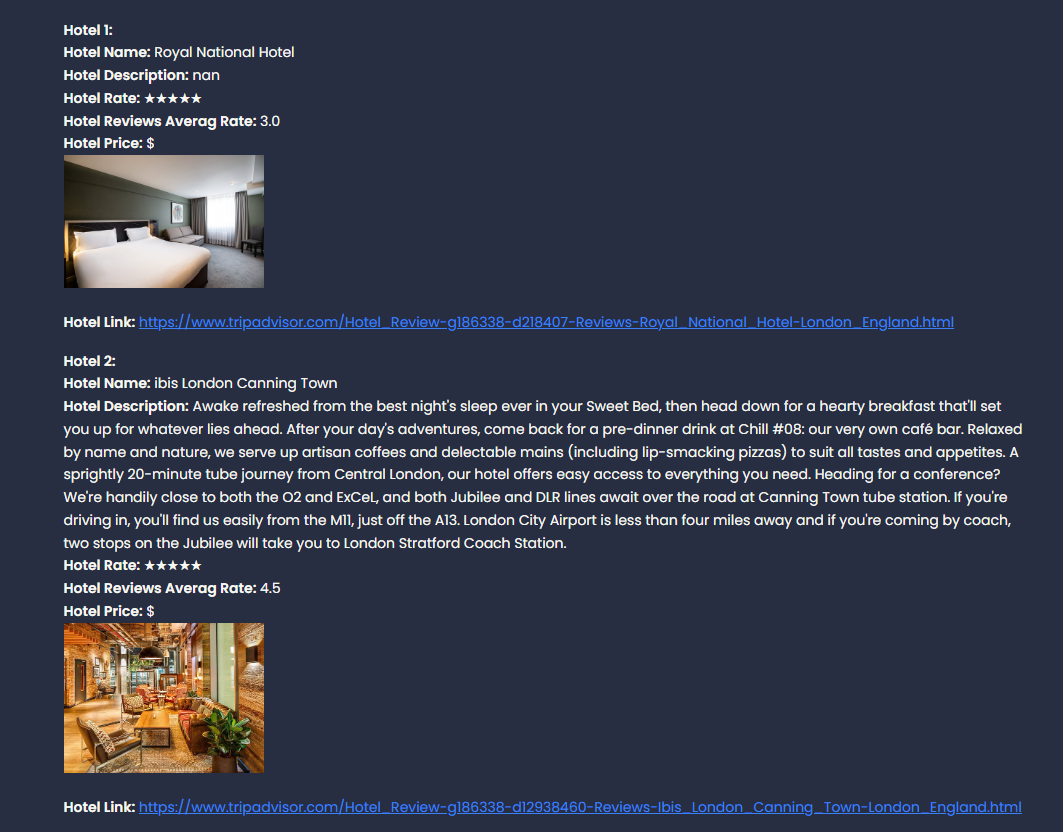

In [ ]:

import gradio as gr

with gr.Blocks(theme='freddyaboulton/dracula_revamped') as demo:

    gr.Markdown("<center><h1> Rahaal Search Engine</h1></center>")
    gr.Markdown("<center>Rahaal is your go-to search engine for finding the perfect hotel, whether you're planning a quick getaway or a long vacation. <br>Enter your preferences, and let Rahaal guide you to the best options tailored to your needs.</center>")
   # with gr.Tab("What kind of hotels are you looking for ?"):


    dropdown1 = gr.Dropdown(choices=['Istanbul', 'San Francisco', 'London', 'New York City', 'Paris'],
                                    label="Select a City")
    dropdown2 = gr.Dropdown(choices=['$', '$$', '$$$'],
                                    label="Select a Price Range")
    text_input = gr.Textbox(label="Enter Your Search")
    with gr.Group():

      #with gr.Row():
      input_button = gr.Button("Search",size="small")

    with gr.Row() as outputRow:
      search_output= gr.Markdown("<h3>The Most Close Reviews are:</h3>")
    with gr.Row() as outputRow:
      output = gr.Markdown()
      input_button.click(fn=search_reviews, inputs=[text_input, dropdown1, dropdown2], outputs=output)
demo.launch()

themes/theme_schema@0.3.9.json:   0%|          | 0.00/12.7k [00:00<?, ?B/s]

Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://512c11c7735a7bb8f5.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)
